In [2]:
from collections import Counter
import re

def normalize_spaces(text):
    return re.sub(r"\s+", " ", text.strip())

phrases = []

with open("quran-uthmani.txt", encoding="utf-8") as f:
    for line in f:
        line = normalize_spaces(line)
        if not line:
            continue

        if "|" in line:
            parts = line.split("|", 2)
            if len(parts) == 3:
                line = parts[2]

        words = line.split(" ")

        if len(words) == 1 or len(words[0]) <= 4 and words[0].isalpha():
            phrase = words[0]
        else:
            phrase = " ".join(words[:2])

        phrases.append(phrase)

In [3]:
freq = Counter(phrases)

sorted_phrases = [p for p, _ in freq.most_common()]

In [4]:
import pandas as pd

df = pd.DataFrame(sorted_phrases, columns=["arabic"])

df.to_csv(
    "quran_ayah_openings_2words.csv",
    index=False,
    encoding="utf-8-sig"
)

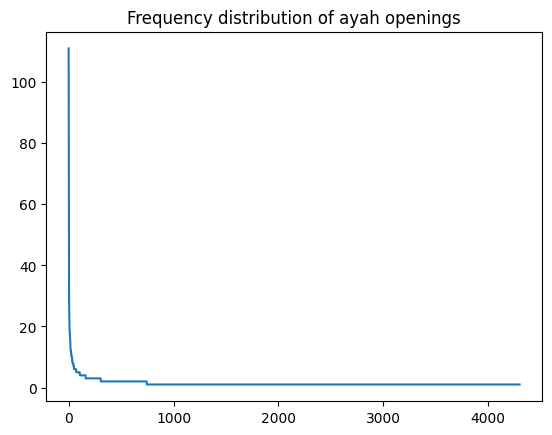

In [5]:
import matplotlib.pyplot as plt

counts = sorted(freq.values(), reverse=True)
plt.plot(counts)
plt.title("Frequency distribution of ayah openings")
plt.show()

In [8]:
print("Total verses:", len(phrases))

Total verses: 6264


In [9]:
bad = [p for p in phrases if p.strip() == "" or len(p.split()) == 0]
print("Empty elements:", len(bad))

Empty elements: 0


In [10]:
from collections import Counter

lengths = Counter(len(p.split()) for p in phrases)
print(lengths)

Counter({2: 6252, 1: 12})


In [11]:
for p in phrases[:20]:
    print(p)

بِسْمِ ٱللَّهِ
ٱلْحَمْدُ لِلَّهِ
ٱلرَّحْمَٰنِ ٱلرَّحِيمِ
مَٰلِكِ يَوْمِ
إِيَّاكَ نَعْبُدُ
ٱهْدِنَا ٱلصِّرَٰطَ
صِرَٰطَ ٱلَّذِينَ
بِسْمِ ٱللَّهِ
ذَٰلِكَ ٱلْكِتَٰبُ
ٱلَّذِينَ يُؤْمِنُونَ
وَٱلَّذِينَ يُؤْمِنُونَ
أُو۟لَٰٓئِكَ عَلَىٰ
إِنَّ ٱلَّذِينَ
خَتَمَ ٱللَّهُ
وَمِنَ ٱلنَّاسِ
يُخَٰدِعُونَ ٱللَّهَ
فِى قُلُوبِهِم
وَإِذَا قِيلَ
أَلَآ إِنَّهُمْ
وَإِذَا قِيلَ


In [12]:
for p, c in freq.most_common(10):
    print(p, c)

بِسْمِ ٱللَّهِ 111
يَٰٓأَيُّهَا ٱلَّذِينَ 87
إِنَّ ٱلَّذِينَ 73
فَبِأَىِّ ءَالَآءِ 32
أَلَمْ تَرَ 30
إِنَّ ٱللَّهَ 28
قَالَ رَبِّ 24
وَمَا كَانَ 20
وَهُوَ ٱلَّذِى 20
وَقَالَ ٱلَّذِينَ 19


In [13]:
tail = [p for p, c in freq.items() if c == 1]
print("Phrases with frequency 1:", len(tail))

Phrases with frequency 1: 3556


In [14]:
for p in sorted_phrases[:50]:
    print(p)

بِسْمِ ٱللَّهِ
يَٰٓأَيُّهَا ٱلَّذِينَ
إِنَّ ٱلَّذِينَ
فَبِأَىِّ ءَالَآءِ
أَلَمْ تَرَ
إِنَّ ٱللَّهَ
قَالَ رَبِّ
وَمَا كَانَ
وَهُوَ ٱلَّذِى
وَقَالَ ٱلَّذِينَ
أُو۟لَٰٓئِكَ ٱلَّذِينَ
هُوَ ٱلَّذِى
إِذْ قَالَ
إِنَّ فِى
وَإِذْ قَالَ
وَإِذَا قِيلَ
وَلَقَدْ ءَاتَيْنَا
وَٱلَّذِينَ ءَامَنُوا۟
وَلَقَدْ أَرْسَلْنَا
يَٰٓأَيُّهَا ٱلنَّاسُ
إِلَّا ٱلَّذِينَ
حَتَّىٰٓ إِذَا
وَمَآ أَدْرَىٰكَ
ٱللَّهُ ٱلَّذِى
أَوَلَمْ يَرَوْا۟
وَإِنَّ رَبَّكَ
وَيْلٌ يَوْمَئِذٍ
وَمِنَ ٱلنَّاسِ
وَٱلَّذِينَ كَفَرُوا۟
إِنَّ هَٰذَا
وَمَآ أَرْسَلْنَا
يَٰٓأَيُّهَا ٱلنَّبِىُّ
أَمْ يَقُولُونَ
قُلْ مَن
قُلْ أَرَءَيْتُمْ
فَٱتَّقُوا۟ ٱللَّهَ
وَمَنْ أَظْلَمُ
ذَٰلِكَ بِأَنَّ
وَمِنْهُم مَّن
مَا كَانَ
إِنَّ رَبَّكَ
قَالَ يَٰقَوْمِ
وَإِذَا تُتْلَىٰ
وَٱلَّذِينَ هُمْ
#
هُوَ ٱلَّذِىٓ
ذَٰلِكَ بِأَنَّهُمْ
وَأَمَّا ٱلَّذِينَ
ٱلَّذِينَ ءَامَنُوا۟
قُلْ إِنَّ


In [15]:
def coverage(top_n):
    top = set(p for p, _ in freq.most_common(top_n))
    covered = sum(1 for p in phrases if p in top)
    return covered / len(phrases)

for n in [100, 300, 500, 1000]:
    print(n, round(coverage(n)*100, 2), "%")

100 18.26 %
300 28.93 %
500 35.41 %
1000 47.3 %


In [16]:
import re

noise = [p for p in phrases if re.search(r"[0-9ۚۖۗ۩]", p)]
print("Noisy phrases:", len(noise))

Noisy phrases: 0
